<strong>We will implement Naïve bayes Algorithm from scratch</strong>

- Naive bayes classifier is a **generative classifier**.

\begin{align} 
\text {posterior} &=& \frac{\text {prior} \times \text{likelihood} } { \text {evidence} }
\\ p(y|\mathbf x) &=& \frac{p(y) \times p(\mathbf x |y) }{p(\mathbf x)} 
\end{align}


![Image source](https://editor.analyticsvidhya.com/uploads/374484.png)

It is calles **Naïve** because it assumes all features are independent of eachother

* It simplifies the calculation of **likelihood** with **conditional independence assumption** i.e NB assumes that the features are conditionally independent.

    * The **likelihood** can be expressed as : 
    \begin{align} 
    p(\mathbf x| y) &=& p(x_1,x_2,\ldots,x_m|y) 
    \\&=& p(x_1|y) \ p(x_2|y) \ldots\ p(x_m|y) \\
    \end{align}

    \begin{align}
    &=& \prod_{j=1}^{m}p(x_j|y) 
    \end{align}


* Substituting likelihood in the Bayes theorem gives us the following formula :
    \begin{equation}
    p(y=y_c|\mathbf x)= \frac{p(y_c)\prod_{j=1}^{m}p(x_j|y_c)}{\sum_{r=1}^kp(y_r) \prod_{j=1}^{m}p(x_j|y_r)}
    \end{equation}

**Inference**

the label that results in highest value of numerator i.e. **likelihood $\times$ prior** is assigned to a given example.

In general :<br>
\begin{equation} 
y = \text {argmax}_y \log p(y) + \sum_{j=1}^{m}\log p(x_j|y)
\end{equation}

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time as time

# Bernoulli Naïve Bayes Implementation

**Parameter estimation** : Class conditional density and prior

Remember that the **class conditional density** for Bernoulli NB is calculated as follows:

\begin{equation} 
w_{y_c} = \frac{\sum_{i=1}^{n} \mathbb {1} (y^{(i)}=y_c)}{n} 
\end{equation} 

Here : 

The numerator gives us **total number of examples with label $y_c$ and is divided by the total number of examples in the training set**.

While estimating parameters of the model, we process examples from each label separately and estimate the parameters.

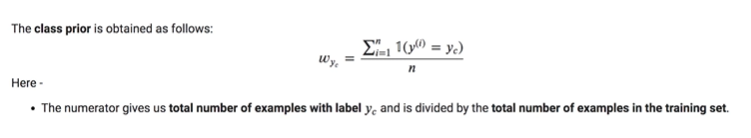

In [2]:
def fit(X, y):
    n_samples, n_features = X.shape
    class_count = np.unique(y) # array of unique features
    n_classes = len(class_count) # number of unique features

    # weight vector initialization
    w = np.zeros((n_classes, n_features), dtype=np.float64)
    w_prior = np.zeros(n_classes, dtype=np.float64)

    for c in range(n_classes):
        # get example with label = c
        X_c = X[y==c]

        # estimation of w_{jy_c}: The parameter of bernoulli separately.
        #  i.e P(x_j | y_c) ~ Ber(w_{jy_c})
        # We have vectorized this operation and we obtain vector w_{y_c} 
        # that contains w_{jy_c} for each x_j.

        w[c, :] = np.sum(X_c, axis=0)/X_c.shape[0] # add along row

        # estination of prior
        w_prior[c] = X_c.shape[0]/float(n_samples) # probab of finding elements of a certain class c

    print(f'Weight vector :\n {w}')
    print(f'Prior :\n {w_prior}')
    return w, w_prior

    

Test the above function

In [4]:
# feature matrix with shape (4,2). x_1 ~ Ber(w_1), x_2~ Ber(w_2)
X = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])

# label vector with shape(4,)
y = np.array([1, 0, 0, 1])

fit(X, y)

Weight vector :
 [[0. 1.]
 [1. 0.]]
Prior :
 [0.5 0.5]


(array([[0., 1.],
        [1., 0.]]), array([0.5, 0.5]))

 **STEP 1** : Filter examples for a class ,say c=1

In [5]:
X_c = X[y==1]
X_c

array([[1, 0],
       [1, 0]])

**STEP 2** : Feature wise sum

In [6]:
np.sum(X_c, axis=0)

array([2, 0])

**STEP 3**: Dividing by class count

In [7]:
w = np.sum(X_c, axis=0)/X_c.shape[0]
w

array([1., 0.])

### **Incorporating Laplace correction**

The zero (0) value for parameter is a problem as it leads to 0 posterior probability. 

We can fix this problem with **Laplace correction** or by adding a small dummy counts in each class for each feature.

* The **class priors** with laplace correction can be calculated as follows:

\begin{equation} 
p(y=y_c)= \frac{\sum \limits_{i=1}^n 1(y^{(i)}=y_c) + \alpha}{n+k\alpha}
\end{equation}

* The **class conditional density** with laplace correction is computed as follows:

\begin{equation} 
\frac{\sum \limits_{i=1}^n 1(y^{(i)}=y_c)x_j^{(i)}+\alpha}{\sum \limits_{i=1}^n 1(y^{(i)}=y_c)+2\alpha}
\end{equation} 

In both cases, we use $\alpha=1$. (**Laplace correction or smoothing**)


### **Inference** 
#### Determine class label

Remember that we assign class label $y_c$ that results in the largest product of likelihood and prior.

\begin{align} 
y_c &=& \text{argmax}_{y_c}\left(\sum \limits_{j=1}^m \log \ p(x_j|y_c;\mathbf w)\right)+ \log \ p(y_c;\mathbf w) \\
\end{align}

\begin{align} 
&=& \text{argmax}_{y_c} \left(\sum \limits_{j=1}^m w_{jy_c}^{x_j}(1-w_{jy_c})^{1-x_j}\right)+\log \ p(y_c;\mathbf w)\\
\end{align}

\begin{align} 
&=& \text{argmax}_{y_c}\left(\sum \limits_{j=1}^m x_j \log \ w_{jy_c}+(1-x_j) \log \ (1-w_{jy_c})\right)+\log \ p(y_c; \mathbf w)
\end{align} 

**NOTE :** We performed these computations in log space to avoid problems with underflow.

Further with vectorization, this is implemented as follows :

\begin{align}
y=\text{argmax}_y \mathbf X \log \mathbf w^T + (1-\mathbf X) \log (1-\mathbf w)^T + \log \mathbf w_{\text {prior}}
\end{align}

In [8]:
class BernoulliNB():
    def __init__(self, alpha=1.0):
        self.alpha = alpha

    def fit(self, X, y):
        n_samples, n_features = X.shape
        class_count = np.unique(y) # array of unique features
        n_classes = len(class_count) # number of unique features

        # weight vector initialization
        self.w = np.zeros((n_classes, n_features), dtype=np.float64)
        self.w_prior = np.zeros(n_classes, dtype=np.float64)

        for c in range(n_classes):
            # get example with label = c
            X_c = X[y==c]

            # estimation of w_{jy_c}: The parameter of bernoulli separately.
            #  i.e P(x_j | y_c) ~ Ber(w_{jy_c})
            # We have vectorized this operation and we obtain vector w_{y_c} 
            # that contains w_{jy_c} for each x_j.

            self.w[c, :] = (np.sum(X_c, axis=0) + self.alpha)/(X_c.shape[0] + 2*self.alpha) # add along row

            # estination of prior
            self.w_prior[c] = (X_c.shape[0]+self.alpha)/(float(n_samples) + n_classes*self.alpha) # probab of finding elements of a certain class c

        print(f'Conditional Densities :\n {self.w}')
        print(f'Prior :\n {self.w_prior}')
    
    def log_likelihood_prior_prod(self, X):
        return X@(np.log(self.w).T) + (1-X)@np.log((1-self.w).T) + np.log(self.w_prior)

    def predict_proba(self,X):
        q = self.log_likelihood_prior_prod(X)
        return np.exp(q)/np.expand_dims(np.sum(np.exp(q),axis=1),axis=1)

    def predict(self, X):
        return np.argmax(self.log_likelihood_prior_prod(X), axis=1)

In [ ]:
ber_nb = BernoulliNB()
ber_nb.fit(X, y)

Conditional Densities :
 [[0.25 0.75]
 [0.75 0.25]]
Prior :
 [0.5 0.5]


In [ ]:
ber_nb.predict(X)

array([1, 0, 0, 1])

In [ ]:
ber_nb.predict_proba(X)

array([[0.1, 0.9],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.1, 0.9]])

In [ ]:
ber_nb.log_likelihood_prior_prod(X)

array([[-3.4657359 , -1.26851133],
       [-1.26851133, -3.4657359 ],
       [-1.26851133, -3.4657359 ],
       [-3.4657359 , -1.26851133]])

*Multi-class classification*

The NB implementation also works in multi-class setting. Here is an example with three classes.

In [ ]:
X = np.array([[1,0],[0,1],[0,1],[1,0],[1,1],[1,1]])
y = np.array([1, 0, 0, 1, 2, 2])

Estimation of parameters of Bernoulli distribution and class priors.

In [ ]:
ber_nb = BernoulliNB() 
ber_nb.fit(X,y)

Conditional Densities :
 [[0.25 0.75]
 [0.75 0.25]
 [0.75 0.75]]
Prior :
 [0.33333333 0.33333333 0.33333333]


In [ ]:
ber_nb.log_likelihood_prior_prod(X)

array([[-3.87120101, -1.67397643, -2.77258872],
       [-1.67397643, -3.87120101, -2.77258872],
       [-1.67397643, -3.87120101, -2.77258872],
       [-3.87120101, -1.67397643, -2.77258872],
       [-2.77258872, -2.77258872, -1.67397643],
       [-2.77258872, -2.77258872, -1.67397643]])

In [ ]:
# let's predict probabilities for each example.
ber_nb.predict_proba(X)

array([[0.07692308, 0.69230769, 0.23076923],
       [0.69230769, 0.07692308, 0.23076923],
       [0.69230769, 0.07692308, 0.23076923],
       [0.07692308, 0.69230769, 0.23076923],
       [0.2       , 0.2       , 0.6       ],
       [0.2       , 0.2       , 0.6       ]])

# Gaussian NB

**Parameterization** 


Here the features have real numbers or continuous values. And we assume that **each feature given label is drawn from a Gaussian distribution.** 

Formally we write it as :
$$ 
x_j|y_r   \sim   \mathcal{N} (\mu , \sigma^2)
$$

* There are two parameters in Gaussian or normal distribution $\mathcal{N}$
    - Mean $ \mu $
  
  * Variance $ \sigma^2 $


* There are $ m \times k $ **Gaussian distribution** - one for each feature and label.

* Each Gaussian distribution has 2 parameters to estimate hence the **total number of parameters** are $2 \times m \times k$.

**Alternate parameterization through multi-variate Gaussian**

Alternatively, for each label, we can assume a multi-variate Gaussian distribution with $ m $ variables.

Such a distribution will have :

* a **mean vector** $(\mu)$ with $m$ components - one mean per feature.

* a **covariance matrix** $(\sum ) \text{with} m\times m $ entries :

  * However since we are making a conditional independence assumption among variables, the covariance matrix is assumed to be diagonal.

  * It's off-diagonal entries are $ 0$ i.e 
\begin{align}
\sum_{jr}=0 \ \text {where} \ j \ne r.
\end{align}
  
  * The diagonal entries denote variance for each feature i.e
\begin{align}
\sum_{jj}= \sigma^2.
\end{align}

In this scheme, we need to estimate $k $ multi-variate Gaussian distributions, one per label.

For each distribution, we need to estimate
* $m$ means

* $m$ variances

As such a number of parameters are the same in both the representation. However the later representation is more efficient in terms of computation.

**Parameter estimation**

Let **$ n_r $ the total number of samples with label** $y_r$.
$$ n_r = \sum \limits_{i=1}^n \mathbb{1}(y^{(i)}=y_r) $$

The parameters for **multivariate Gaussian** for label $r$ can be calculated as follows:

\begin{align} 
\mu_r &=&\frac{1}{n_r}\sum \limits_{i=1}^n 1(y^{(i)}=y_r) \mathbf x^{(i)} 
\end{align}

\begin{align}
\\ {{\sum}_{jjr}^2}&=&\frac{1}{n_r}\sum \limits_{i=1}^n 1(y^{(i)}=y_r)(\mathbf x^{(i)}-\mu_r)^2 \\
\end{align}

**Inference** 

The posterior probability can be  calculated based on Bayes theorem :
$$ p(y=y_c | \mathbf x) = \frac{p(\mathbf x| y_c) \ p(y_c)}{p(y_c)}$$

The likelihood is computed with following formula:
$$ p(x_j|y_c; \mu_{jc},\sigma_{jc}^2)=\frac{1}{\sqrt {2 \pi} \sigma_{jc}} e^{- \frac{1}{2} \left(\frac{x_j-\mu_{jc}}{\sigma{jc}} \right)^2}$$

This can be implemented with multi-variate Gaussian distribution with diagonal covariance matrix:
$$ p(x_j|y_c; \mu_{jc},{\sum}_c)=\frac{1}{{(2\pi)}^{\frac{d}{2}} |{\sum}_c|^{\frac{1}{2}}}e^{-\frac{1}{2}}(\mathbf x -\mu_c)^T \small \small {\small {\sum}_c^{-1}}(\mathbf x -\mu_c)$$ 

It is interesting to note that : 
* We calculate the distance between the mean and the sample normalized by the variance : 

\begin{align}
{-\frac{1}{2}}(\mathbf x -\mu_c)^T \small \small {\small {\sum}_c^{-1}}(\mathbf x -\mu_c)
\end{align}

* We calculate exponential of this distance and convert it into probability by dividing it with : 

\begin{align}
{{(2\pi)}^{\frac{d}{2}} |{\sum}_c|^{\frac{1}{2}}}
\end{align}

* Derived formula for probablity of a multi-variate Gaussian distribution is :

\begin{align}
\frac{{-\frac{1}{2}}(\mathbf x -\mu_c)^T \small \small {\small {\sum}_c^{-1}}(\mathbf x -\mu_c)} {{(2\pi)}^{\frac{d}{2}} |{\sum}_c|^{\frac{1}{2}}}
\end{align}

In [35]:
import numpy as np 

class GaussianNB(object):
    def fit(self, X, y):
        '''parameter estimation for gaussian distribution'''
        n_samples, n_features = X.shape

        self._classes = np.unique(y)
        n_classes = len(self._classes)

    # calculate mean, var, and prior for each class.

        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            # Get examples with label $c$
            X_c = X[y == c]

            # estimate mean from the training examples of class $c$
            self._mean[idx, :] = X_c.mean(axis=0)

            # estimate variance from the training examples of class $c$.
            self._var[idx, :] = X_c.var(axis=0)

            # estimate the priors - based on fraction of examples with label c among all the training examples.

            self._priors[idx] = X_c.shape[0]/float(n_samples)

        print('Mean :\n', self._mean)
        print()
        print('Variance :\n', self._var)
        print()
        print('Priors :', self._priors)

    def _calc_pdf(self, class_idx, X):
        ''' calculates probability density for samples for class label class_idx.'''

        mean = self._mean[class_idx]
        var = np.diag(self._var[class_idx])
        z = np.power(2*np.pi, X.shape[0]/2)*np.power(np.linalg.det(var), 1/2)

        return (1/z)*np.exp(-(1/2)*(X-mean).T@(np.linalg.inv(var))@(X-mean))

    def _calc_prod_likelihood_prior(self, X):
        ''' calculates product of likelihood and priors.'''

        self._prod_likelihood_prior = np.zeros(
            (X.shape[0], len(self._classes)), dtype=np.float64)

        for x_idx, x in enumerate(X):
            for idx, c in enumerate(self._classes):
                self._prod_likelihood_prior[x_idx, c] = (
                np.log(self._calc_pdf(idx, x)) + np.log(self._priors[idx]))

    def predict(self, X):
        ''' predict class labels for each example'''

        self._calc_prod_likelihood_prior(X)
        return np.argmax(self._prod_likelihood_prior, axis=1)

    def predict_proba(self, X):
        ''' calculates probability of each example belonging to different classes.'''

        self._calc_prod_likelihood_prior(X)
        return np.exp(self._prod_likelihood_prior)/np.expand_dims(np.sum(np.exp(self._prod_likelihood_prior), axis=1), axis=1)

**Demo**

We will demonstrate working on least square classification in the following set ups:
1. Binary classification set up.

2. Multi-class classification set up

*Binary classification* 

* Generates examples from two classes.

* Divide the data into train and test split.

* Train the model on the examples from training set.

* Evaluate the classification performation on the test set.

**STEP 1** : Generate training data with two multi-variate Gaussian distribution one with mean \[5, 5\] and the second one with mean \[10, 10\] and standard deviation 1.5 for each Gaussian.

* The number of features per example = 2 

* Total number of examples =100

In [36]:
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split

X, y= make_blobs(n_samples=100,
                  n_features=2,
                  centers=[[5, 5], [10, 10]],
                  cluster_std=1.5,
                  random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size=0.2, 
                                    random_state=123)
X_test[:5]

array([[ 1.93951543,  5.06938328],
       [14.9196181 , 11.45629198],
       [ 8.29852228,  8.93886867],
       [ 4.42772528,  5.09973351],
       [11.12794727,  8.50935853]])

**STEP 2** : Train the naive bayes classifier.

In [37]:
gaus_nb =GaussianNB()
gaus_nb.fit(X_train,y_train)

Mean :
 [[ 4.55853975  5.01739665]
 [10.30431548 10.08580617]]

Variance :
 [[2.13298417 2.30222002]
 [3.22242307 2.20662074]]

Priors : [0.5125 0.4875]


Observe that since each examples has two features and we have two classes, we have :

* Mean vector for each class has two components-mean for feature 1 and feature 2.

* Variance also has two entries-one for variance of feature 1 and feature 2. 

**Note** : 
We are only storing the diagonal elements of covariance matrix for each class label.

There are two priors - one for each class.

* Since we are performing parameter estimation on examples generated from the known distributions, we can compare estimated means with the actual means.

* One distribution has mean close to \[5,5\] and the other one has mean close to \[10,10\] which are **very close to the actual means**.

<Figure size 864x576 with 0 Axes>

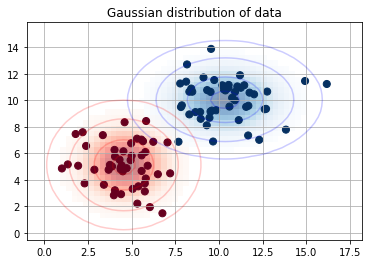

In [38]:
plt.figure(figsize=(12,8))
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

xlim = (min(X[:, 0])-2, max(X[:, 0])+2)
ylim = (min(X[:, 1])-2, max(X[:, 1])+2)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)

xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T


for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu)**2 / std**2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape),
                alpha=0.5, cmap=color.title()+'s')
    ax.contour(xx, yy, P.reshape(xx.shape), levels=[
                0.01, 0.1, 0.5, 0.9], colors=color, alpha=0.2)

ax.set(xlim=xlim, ylim=ylim)
plt.grid()
plt.title("Gaussian distribution of data")
plt.show()

**STEP 4**: Let's test the inference procedure on the test data.

In [39]:
gaus_nb.predict(X_test)

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0])